In [42]:
# import dependencies
from api_keys import census_key
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from census import Census
import hvplot.pandas
import scipy.stats as st
import plotly.express as px

In [2]:
# import csv files
pop_df = pd.read_csv("pop_change.csv")
add_data_df = pd.read_csv("state_without_in.csv")
# rename STATE column to State
pop_df.rename(columns={"STATE": "State"}, inplace=True)
# merge dataframes
state_df = pd.merge(pop_df, add_data_df, on="State")
state_df

,State,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT,Poverty Rate,Unemployment Rate,Median Household Income,Percentage without Health Insurance
0,Alabama,4858979.0,4863300.0,4874747.0,4887871.0,4903185.0,5024803.0,5039877.0,180898.0,3.722963,15.8,5.4,76150.0,9.7
1,Alaska,738432.0,741894.0,739795.0,737438.0,731545.0,732441.0,732673.0,-5759.0,-0.779896,10.4,6.9,103258.0,12.2
2,Arizona,6828065.0,6931071.0,7016270.0,7171646.0,7278717.0,7177986.0,7276316.0,448251.0,6.564832,13.5,5.6,89693.0,10.7
3,Arkansas,2978204.0,2988248.0,3004279.0,3013825.0,3017804.0,3012232.0,3025891.0,47687.0,1.601200,16.0,5.3,73346.0,8.7
4,California,39144818.0,39250017.0,39536653.0,39557045.0,39512223.0,39499738.0,39237836.0,93018.0,0.237625,12.3,6.5,119149.0,7.2
5,Colorado,5456574.0,5540545.0,5607154.0,5695564.0,5758736.0,5784308.0,5812069.0,355495.0,6.514985,9.6,4.6,107446.0,7.9
6,Connecticut,3590886.0,3576452.0,3588184.0,3572665.0,3565287.0,3600260.0,3605597.0,14711.0,0.409676,10.0,6.1,120670.0,5.2
7,Delaware,945934.0,952065.0,961939.0,967171.0,973764.0,991886.0,1003384.0,57450.0,6.073362,11.4,5.7,97081.0,5.8
8,District of Columbia,672228.0,681170.0,693972.0,702455.0,705749.0,690093.0,670050.0,-2178.0,-0.323997,15.4,7.1,138421.0,3.4
9,Florida,20271272.0,20612439.0,20984400.0,21299325.0,21477737.0,21569932.0,21781128.0,1509856.0,7.448255,13.1,5.3,88267.0,12.6


In [4]:
# find total population increase as a percentage and add to dataframe
state_df["POP_CHANGE_PCT"] = (state_df["POP_CHANGE_TOTAL"] / state_df["POP_2015"]) * 100
state_df

,State,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT,Poverty Rate,Unemployment Rate,Median Household Income,Percentage without Health Insurance
0,Alabama,4858979.0,4863300.0,4874747.0,4887871.0,4903185.0,5024803.0,5039877.0,180898.0,3.722963,15.8,5.4,76150.0,9.7
1,Alaska,738432.0,741894.0,739795.0,737438.0,731545.0,732441.0,732673.0,-5759.0,-0.779896,10.4,6.9,103258.0,12.2
2,Arizona,6828065.0,6931071.0,7016270.0,7171646.0,7278717.0,7177986.0,7276316.0,448251.0,6.564832,13.5,5.6,89693.0,10.7
3,Arkansas,2978204.0,2988248.0,3004279.0,3013825.0,3017804.0,3012232.0,3025891.0,47687.0,1.601200,16.0,5.3,73346.0,8.7
4,California,39144818.0,39250017.0,39536653.0,39557045.0,39512223.0,39499738.0,39237836.0,93018.0,0.237625,12.3,6.5,119149.0,7.2
5,Colorado,5456574.0,5540545.0,5607154.0,5695564.0,5758736.0,5784308.0,5812069.0,355495.0,6.514985,9.6,4.6,107446.0,7.9
6,Connecticut,3590886.0,3576452.0,3588184.0,3572665.0,3565287.0,3600260.0,3605597.0,14711.0,0.409676,10.0,6.1,120670.0,5.2
7,Delaware,945934.0,952065.0,961939.0,967171.0,973764.0,991886.0,1003384.0,57450.0,6.073362,11.4,5.7,97081.0,5.8
8,District of Columbia,672228.0,681170.0,693972.0,702455.0,705749.0,690093.0,670050.0,-2178.0,-0.323997,15.4,7.1,138421.0,3.4
9,Florida,20271272.0,20612439.0,20984400.0,21299325.0,21477737.0,21569932.0,21781128.0,1509856.0,7.448255,13.1,5.3,88267.0,12.6


In [5]:
# sort dataframe by population change percentage
sorted_pop_df = state_df.sort_values(by=["POP_CHANGE_PCT"], ascending=False)
sorted_pop_df

,State,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT,Poverty Rate,Unemployment Rate,Median Household Income,Percentage without Health Insurance
12,Idaho,1654930.0,1683140.0,1716943.0,1754208.0,1787065.0,1847772.0,1900923.0,245993.0,14.864254,11.4,4.0,83777.0,10.2
45,Utah,2995919.0,3051217.0,3101833.0,3161105.0,3205958.0,3281684.0,3337975.0,342056.0,11.417398,8.8,3.5,101412.0,9.0
28,Nevada,2890845.0,2940058.0,2998039.0,3034392.0,3080156.0,3114071.0,3143991.0,253146.0,8.756817,12.9,7.1,89562.0,11.3
48,Washington,7170351.0,7288000.0,7405743.0,7535591.0,7614893.0,7718785.0,7738692.0,568341.0,7.926265,10.0,5.1,111431.0,6.4
44,Texas,27469114.0,27862596.0,28304596.0,28701845.0,28995881.0,29217653.0,29527941.0,2058827.0,7.495062,14.0,5.4,94115.0,17.6
9,Florida,20271272.0,20612439.0,20984400.0,21299325.0,21477737.0,21569932.0,21781128.0,1509856.0,7.448255,13.1,5.3,88267.0,12.6
26,Montana,1032949.0,1042520.0,1050493.0,1062305.0,1068778.0,1086193.0,1104271.0,71322.0,6.904697,12.5,4.1,82237.0,8.6
2,Arizona,6828065.0,6931071.0,7016270.0,7171646.0,7278717.0,7177986.0,7276316.0,448251.0,6.564832,13.5,5.6,89693.0,10.7
5,Colorado,5456574.0,5540545.0,5607154.0,5695564.0,5758736.0,5784308.0,5812069.0,355495.0,6.514985,9.6,4.6,107446.0,7.9
7,Delaware,945934.0,952065.0,961939.0,967171.0,973764.0,991886.0,1003384.0,57450.0,6.073362,11.4,5.7,97081.0,5.8


In [6]:
# sort a new dataframe by population change total
sorted_total_df = state_df.sort_values(by=["POP_CHANGE_TOTAL"], ascending=False)

In [7]:
# create a new dataframe with the top 5 states with the highest population increase
top_5_pop_df = sorted_total_df.head(5)
top_5_pop_df

,State,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT,Poverty Rate,Unemployment Rate,Median Household Income,Percentage without Health Insurance
44,Texas,27469114.0,27862596.0,28304596.0,28701845.0,28995881.0,29217653.0,29527941.0,2058827.0,7.495062,14.0,5.4,94115.0,17.6
9,Florida,20271272.0,20612439.0,20984400.0,21299325.0,21477737.0,21569932.0,21781128.0,1509856.0,7.448255,13.1,5.3,88267.0,12.6
10,Georgia,10214860.0,10310371.0,10429379.0,10519475.0,10617423.0,10725800.0,10799566.0,584706.0,5.724073,13.9,5.5,91082.0,13.1
48,Washington,7170351.0,7288000.0,7405743.0,7535591.0,7614893.0,7718785.0,7738692.0,568341.0,7.926265,10.0,5.1,111431.0,6.4
33,North Carolina,10042802.0,10146788.0,10273419.0,10383620.0,10488084.0,10457177.0,10551162.0,508360.0,5.061934,13.7,5.3,84888.0,10.7


In [8]:
# create a new dataframe with the top 5 states with the highest population increase percentage
top_5_pct_df = sorted_pop_df.head(5)
top_5_pct_df

,State,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT,Poverty Rate,Unemployment Rate,Median Household Income,Percentage without Health Insurance
12,Idaho,1654930.0,1683140.0,1716943.0,1754208.0,1787065.0,1847772.0,1900923.0,245993.0,14.864254,11.4,4.0,83777.0,10.2
45,Utah,2995919.0,3051217.0,3101833.0,3161105.0,3205958.0,3281684.0,3337975.0,342056.0,11.417398,8.8,3.5,101412.0,9.0
28,Nevada,2890845.0,2940058.0,2998039.0,3034392.0,3080156.0,3114071.0,3143991.0,253146.0,8.756817,12.9,7.1,89562.0,11.3
48,Washington,7170351.0,7288000.0,7405743.0,7535591.0,7614893.0,7718785.0,7738692.0,568341.0,7.926265,10.0,5.1,111431.0,6.4
44,Texas,27469114.0,27862596.0,28304596.0,28701845.0,28995881.0,29217653.0,29527941.0,2058827.0,7.495062,14.0,5.4,94115.0,17.6


In [9]:
# make a list of population values for 2015-2021 for the top 5 states and a list of years
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
texas = [top_5_pop_df["POP_2015"].values[0], top_5_pop_df["POP_2016"].values[0], top_5_pop_df["POP_2017"].values[0], top_5_pop_df["POP_2018"].values[0], top_5_pop_df["POP_2019"].values[0], top_5_pop_df["POP_2020"].values[0], top_5_pop_df["POP_2021"].values[0]]
florida = [top_5_pop_df["POP_2015"].values[1], top_5_pop_df["POP_2016"].values[1], top_5_pop_df["POP_2017"].values[1], top_5_pop_df["POP_2018"].values[1], top_5_pop_df["POP_2019"].values[1], top_5_pop_df["POP_2020"].values[1], top_5_pop_df["POP_2021"].values[1]]
georgia = [top_5_pop_df["POP_2015"].values[2], top_5_pop_df["POP_2016"].values[2], top_5_pop_df["POP_2017"].values[2], top_5_pop_df["POP_2018"].values[2], top_5_pop_df["POP_2019"].values[2], top_5_pop_df["POP_2020"].values[2], top_5_pop_df["POP_2021"].values[2]]
washington = [top_5_pop_df["POP_2015"].values[3], top_5_pop_df["POP_2016"].values[3], top_5_pop_df["POP_2017"].values[3], top_5_pop_df["POP_2018"].values[3], top_5_pop_df["POP_2019"].values[3], top_5_pop_df["POP_2020"].values[3], top_5_pop_df["POP_2021"].values[3]]
north_carolina = [top_5_pop_df["POP_2015"].values[4], top_5_pop_df["POP_2016"].values[4], top_5_pop_df["POP_2017"].values[4], top_5_pop_df["POP_2018"].values[4], top_5_pop_df["POP_2019"].values[4], top_5_pop_df["POP_2020"].values[4], top_5_pop_df["POP_2021"].values[4]]

In [14]:
# create a bar graph of the top 5 states with the highest population increase
top_5_pop_bar = top_5_pop_df.hvplot.bar(x="State", y="POP_CHANGE_TOTAL", rot=45, title="Top 5 States with the Highest Population Increase",color="POP_CHANGE_TOTAL", xlabel="State", ylabel="Population Increase", height=800, width=1250, fontscale=1.8)
top_5_pop_bar

:Bars   [State]   (POP_CHANGE_TOTAL)

In [15]:
# create a bar graph of the top 5 states with the highest population increase percentage
top_5_pct_bar = top_5_pct_df.hvplot.bar(x="State", y="POP_CHANGE_PCT", rot=45, title="Top 5 States with the Highest Population Increase Percentage",color="POP_CHANGE_PCT", xlabel="State", ylabel="Population Increase Percentage", height=800, width=1250, fontscale=1.8)
top_5_pct_bar

:Bars   [State]   (POP_CHANGE_PCT)

In [16]:
# output csv of sorted dataframe
sorted_pop_df.to_csv("state_pop_change_sorted.csv", index=False)

In [17]:
# create bar chart of population change percentage
state_plot = state_df.hvplot.bar(x="State", y="POP_CHANGE_PCT", color='POP_CHANGE_PCT', cmap='Purples', rot=90, title="Population Percentage Change by State (2015-2021)", xlabel="State", ylabel="Population Change (%)",c='POP_CHANGE_PCT', colorbar=True, height=1000, width=1500)
state_plot

:Bars   [State]   (POP_CHANGE_PCT)

In [18]:
# create bar chart of population change total
state_plot2 = state_df.hvplot.bar(x="State", y="POP_CHANGE_TOTAL", color='POP_CHANGE_TOTAL', cmap='Blues', rot=90, title="Population Total Change by State (2015-2021)", xlabel="State", ylabel="Population Change (Total)",c='POP_CHANGE_TOTAL', colorbar=True, height=1000, width=1500)
state_plot2

:Bars   [State]   (POP_CHANGE_TOTAL)

In [19]:
# exclude Puerto Rico from dataframe
state_df2 = state_df[state_df.State != "Puerto Rico"]
# create new dataframe sorted by states in unemployment rate
state_unem_df = state_df2.sort_values(by=["Unemployment Rate"], ascending=False)
# create a plot of population change percentage vs unemployment rate
state_plot3 = state_unem_df.hvplot.scatter(x="POP_CHANGE_PCT", y="Unemployment Rate", color='State', title="Population Percentage Change vs Unemployment Rate by State (2015-2021)", xlabel="Population Change (%)", ylabel="Unemployment Rate (%)",c='POP_CHANGE_PCT',size=80, colorbar=False, height=1000, width=1500, fontscale=2.1)
state_plot3

:Scatter   [POP_CHANGE_PCT]   (Unemployment Rate,State)

In [20]:
# remove Texas and Florida from dataframe
state_unem_df2 = state_unem_df[state_unem_df.State != "Texas"]
state_unem_df2 = state_unem_df2[state_unem_df2.State != "Florida"]
# create a plot of population change total vs unemployment rate
state_plot6 = state_unem_df2.hvplot.scatter(x="POP_CHANGE_TOTAL", y="Unemployment Rate", color='State', title="Population Total Change vs Unemployment Rate by State (2015-2021)", xlabel="Population Change (Total)", ylabel="Unemployment Rate (%)",c='POP_CHANGE_TOTAL',size=80, colorbar=True, height=1000, width=1500, fontscale=2.1)
state_plot6

:Scatter   [POP_CHANGE_TOTAL]   (Unemployment Rate,State)

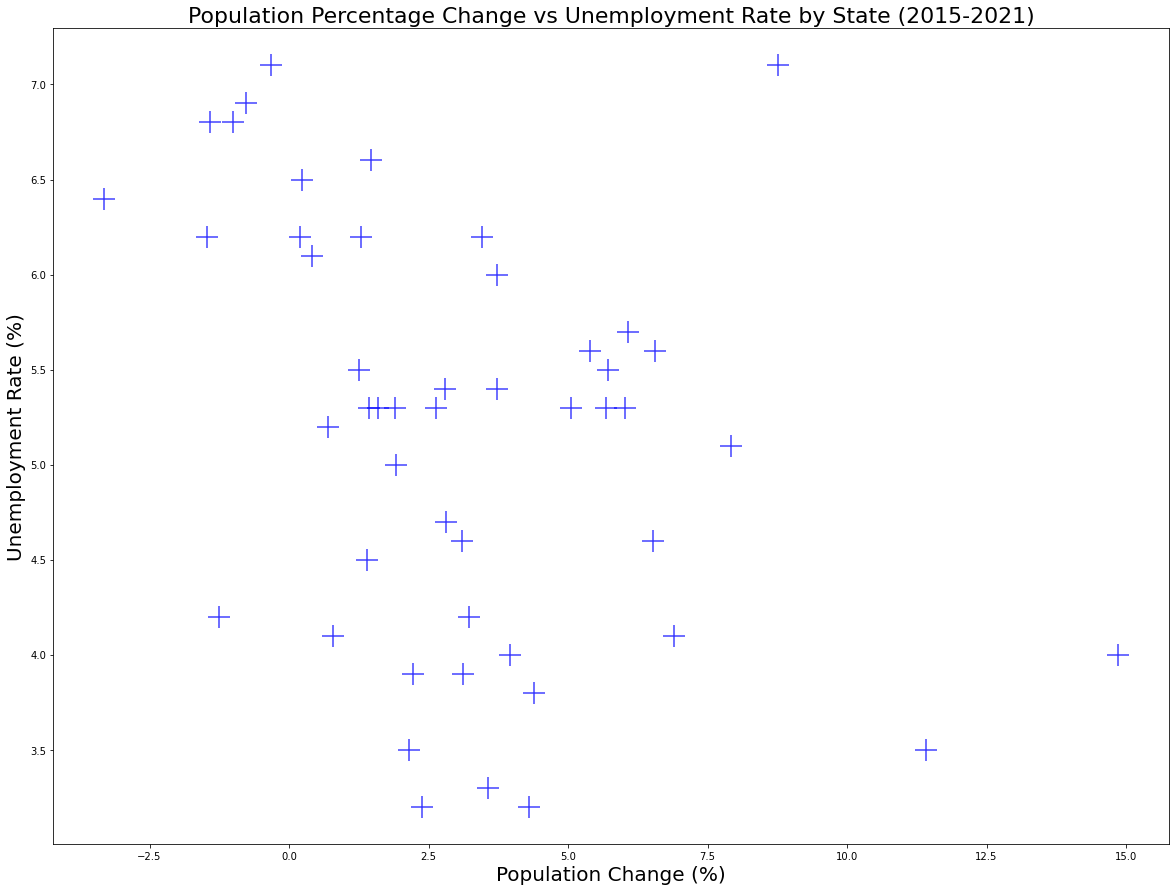

In [21]:
# create a scatter plot with matplotlib of population change percentage vs unemployment rate
plt.figure(figsize=(20,15))
plt.scatter(state_unem_df2["POP_CHANGE_PCT"], state_unem_df2["Unemployment Rate"], marker="+", s=500, color="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Population Change (%)", fontsize=20)
plt.ylabel("Unemployment Rate (%)", fontsize=20)
plt.title("Population Percentage Change vs Unemployment Rate by State (2015-2021)", fontsize=22)
plt.show()

The correlation between both factors is -0.36
y = -0.12x + 5.54


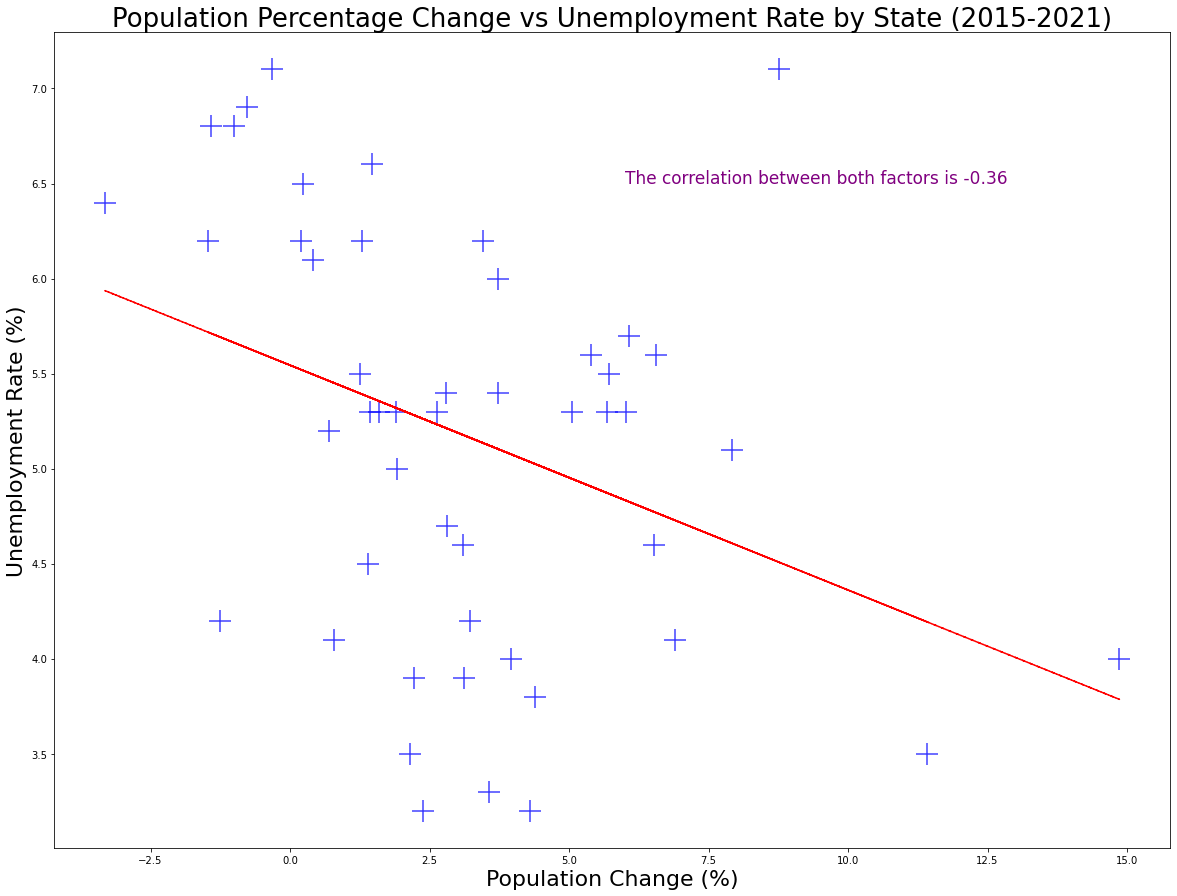

In [24]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_unem_df2["POP_CHANGE_PCT"], state_unem_df2["Unemployment Rate"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_unem_df2["POP_CHANGE_PCT"]
y_values = state_unem_df2["Unemployment Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values, marker="+", s=500, color="blue", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values, "--", color="red")
plt.xlabel("Population Change (%)", fontsize=22)
plt.ylabel("Unemployment Rate (%)", fontsize=22)
plt.title("Population Percentage Change vs Unemployment Rate by State (2015-2021)", fontsize=26)
plt.annotate((f"The correlation between both factors is {round(correlation[0],2)}"),(6,6.5),fontsize=17,color="purple")
# save the figure
plt.savefig("pop_change_pct_vs_unem_rate.png")
plt.show()

The correlation between both factors is -0.09
y = -0.0x + 5.26


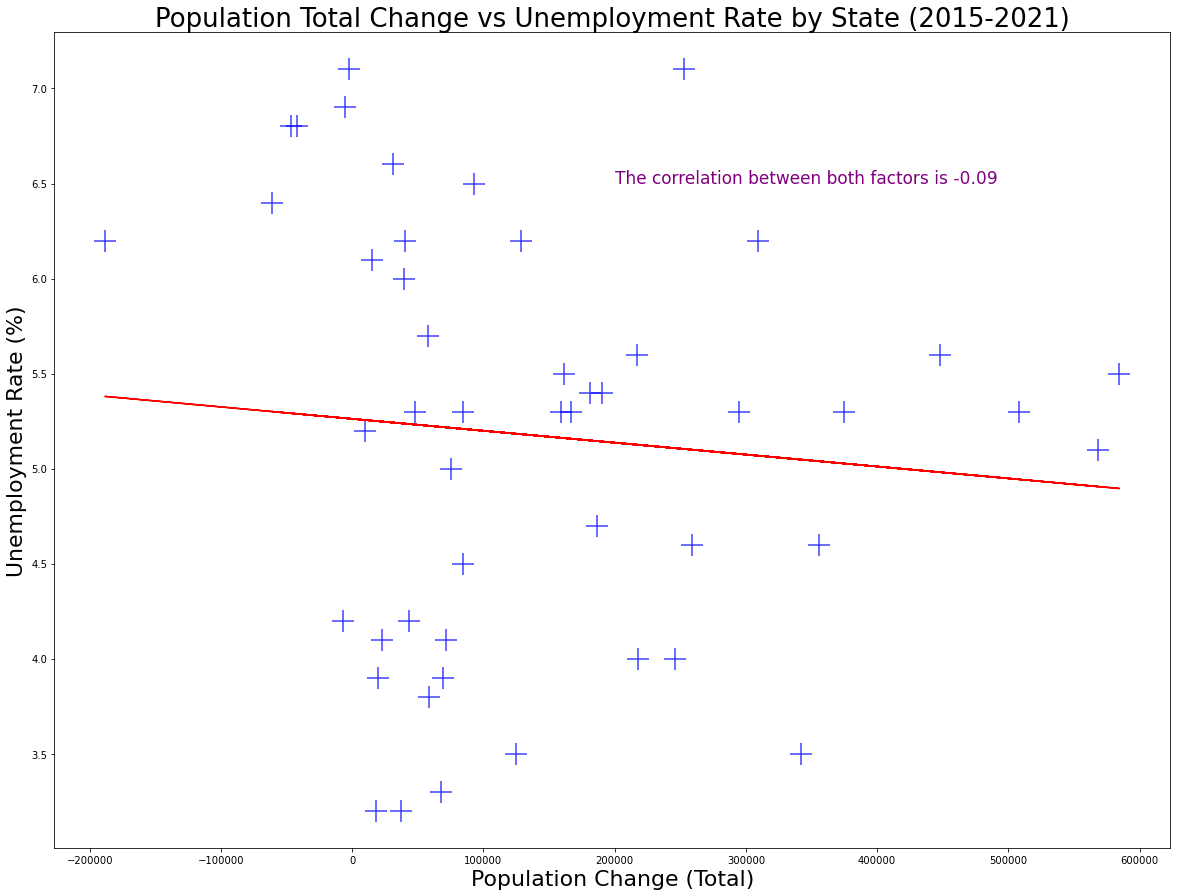

In [25]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_unem_df2["POP_CHANGE_TOTAL"], state_unem_df2["Unemployment Rate"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_unem_df2["POP_CHANGE_TOTAL"]
y_values = state_unem_df2["Unemployment Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values, marker="+", s=500, color="blue", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (Total)", fontsize=22)
plt.ylabel("Unemployment Rate (%)", fontsize=22)
plt.title("Population Total Change vs Unemployment Rate by State (2015-2021)", fontsize=26)
plt.annotate((f"The correlation between both factors is {round(correlation[0],2)}"),(200000,6.5),fontsize=17,color="purple")
plt.savefig("pop_change_total_vs_unem_rate.png")
plt.show()

In [26]:
# create a new dataframe sorting the top states in poverty rate
state_pov_df = state_df2.sort_values(by=["Poverty Rate"], ascending=False)
# create a plot of population change percentage vs poverty rate
state_plot4 = state_pov_df.hvplot.scatter(x="POP_CHANGE_PCT", y="Poverty Rate", color='State', title="Population Percentage Change vs Poverty Rate by State (2015-2021)", xlabel="Population Change (%)", ylabel="Poverty Rate (%)",c='POP_CHANGE_PCT',size=80, colorbar=True, height=1000, width=1500, fontscale=2.1)
state_plot4

:Scatter   [POP_CHANGE_PCT]   (Poverty Rate,State)

In [27]:
# remove Texas and Florida from dataframe
state_pov_df2 = state_pov_df[state_pov_df.State != "Texas"]
state_pov_df2 = state_pov_df2[state_pov_df2.State != "Florida"]
# create a plot of population change total vs poverty rate
state_plot7 = state_pov_df2.hvplot.scatter(x="POP_CHANGE_TOTAL", y="Poverty Rate", color='State', title="Population Total Change vs Poverty Rate by State (2015-2021)", xlabel="Population Change (Total)", ylabel="Poverty Rate (%)",c='POP_CHANGE_TOTAL',size=80, colorbar=True, height=1000, width=1500, fontscale=2.1)
state_plot7

:Scatter   [POP_CHANGE_TOTAL]   (Poverty Rate,State)

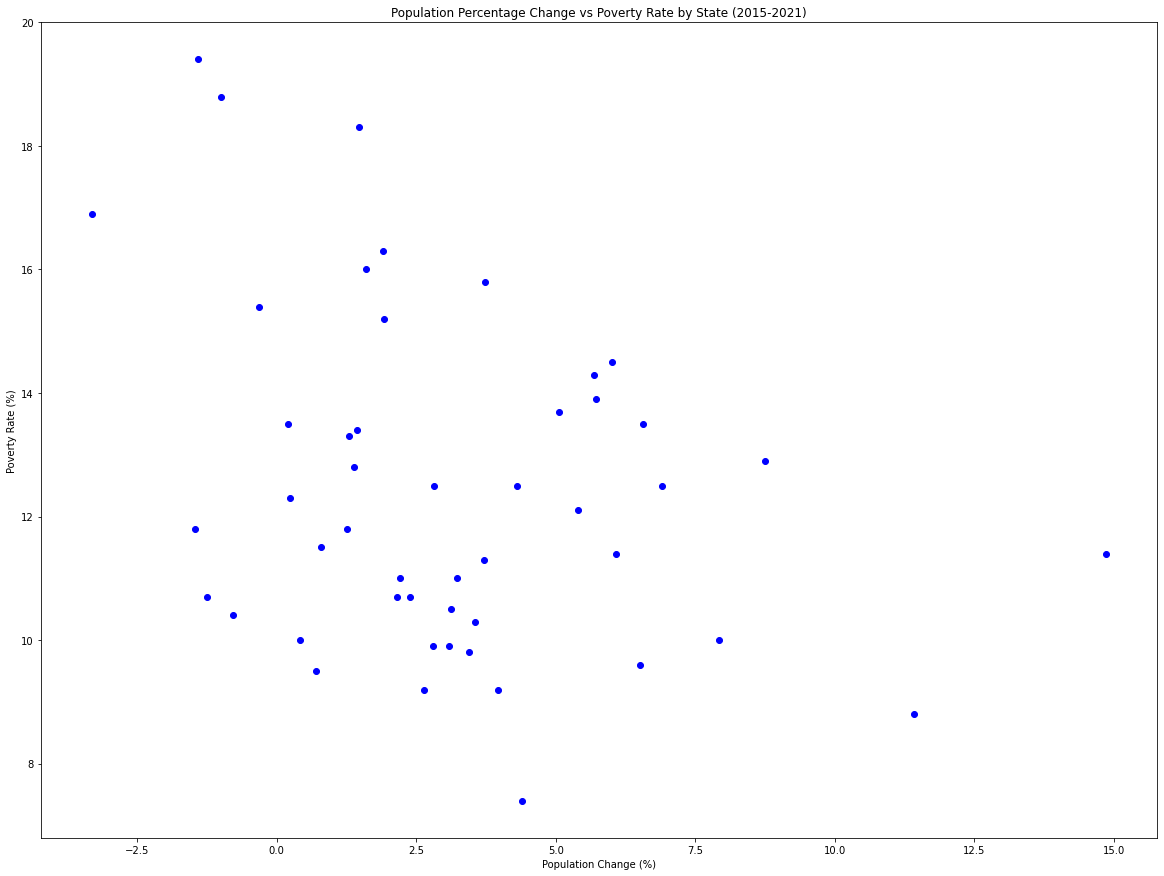

In [28]:
# create a scatter plot with matplotlib of population change percentage vs poverty rate
plt.figure(figsize=(20,15))
plt.plot(state_pov_df2["POP_CHANGE_PCT"], state_pov_df2["Poverty Rate"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population Change (%)")
plt.ylabel("Poverty Rate (%)")
plt.title("Population Percentage Change vs Poverty Rate by State (2015-2021)")
plt.show()

The correlation between both factors is -0.31
y = -0.25x + 13.19


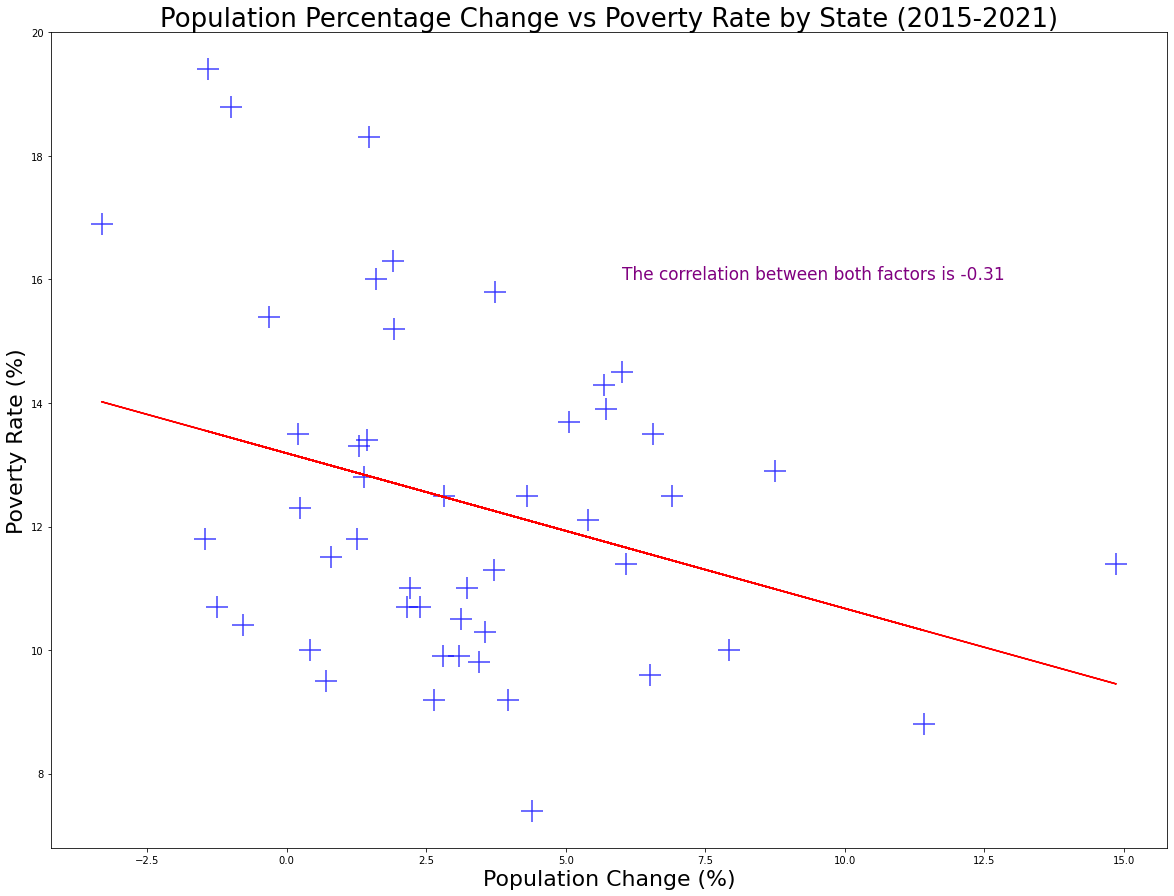

In [29]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_pov_df2["POP_CHANGE_PCT"], state_pov_df2["Poverty Rate"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_pov_df2["POP_CHANGE_PCT"]
y_values = state_pov_df2["Poverty Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values, marker="+", s=500, color="blue", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (%)", fontsize=22)
plt.ylabel("Poverty Rate (%)", fontsize=22)
plt.title("Population Percentage Change vs Poverty Rate by State (2015-2021)", fontsize=26)
plt.annotate((f"The correlation between both factors is {round(correlation[0],2)}"),(6,16),fontsize=17,color="purple")
plt.savefig("pop_change_pct_vs_pov_rate.png")
plt.show()

The correlation between both factors is -0.16
y = -0.0x + 12.78


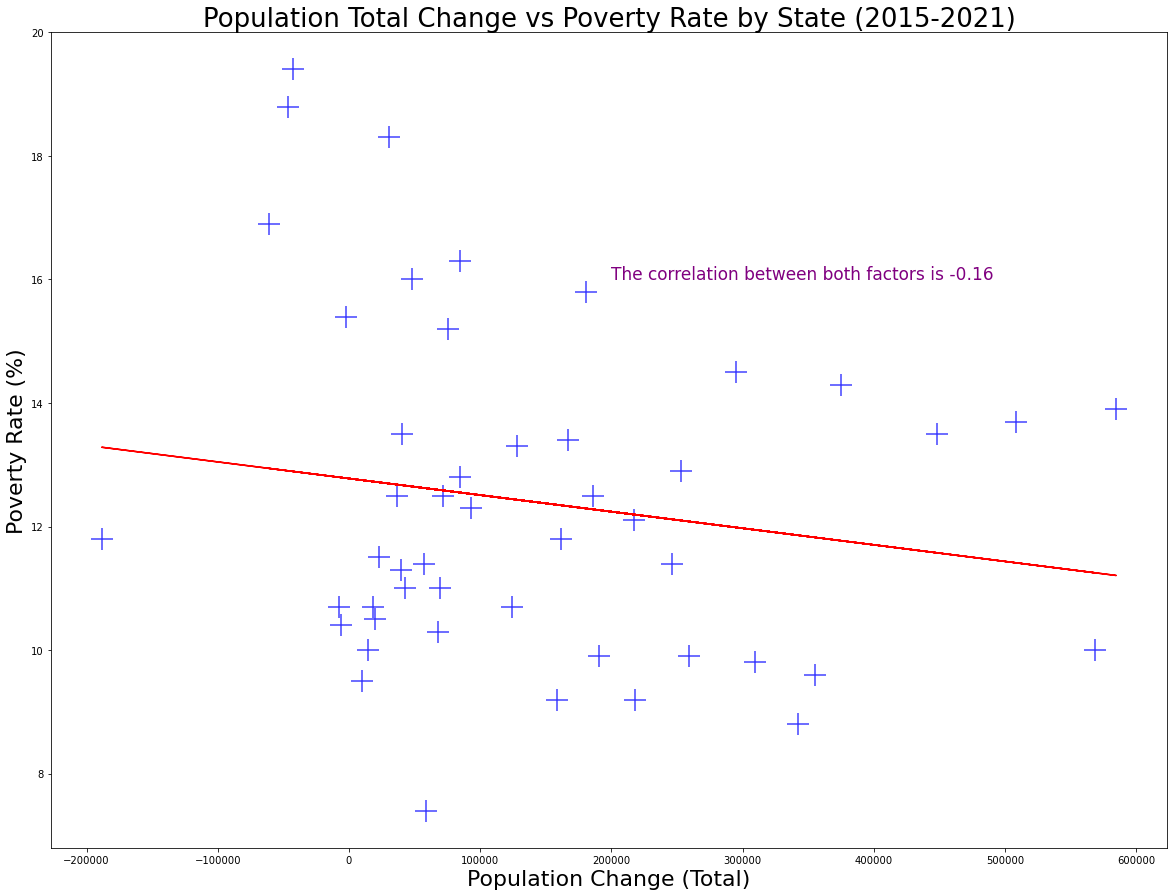

In [30]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_pov_df2["POP_CHANGE_TOTAL"], state_pov_df2["Poverty Rate"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_pov_df2["POP_CHANGE_TOTAL"]
y_values = state_pov_df2["Poverty Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values, marker="+", s=500, color="blue", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (Total)", fontsize=22)
plt.ylabel("Poverty Rate (%)", fontsize=22)
plt.title("Population Total Change vs Poverty Rate by State (2015-2021)", fontsize=26)
plt.annotate((f"The correlation between both factors is {round(correlation[0],2)}"),(200000,16),fontsize=17,color="purple")
plt.savefig("pop_change_total_vs_pov_rate.png")
plt.show()

In [34]:
# create a new dataframe sorting by the top states in Percentage without Health Insurance
state_pwhi_df = state_df2.sort_values(by=["Percentage without Health Insurance"], ascending=False)
# create a plot of population change percentage vs poverty rate
state_plot5 = state_pwhi_df.hvplot.scatter(x="POP_CHANGE_PCT", y="Percentage without Health Insurance", color='State', title="Population Percentage Change vs Percentage without Health Insurance by State (2015-2021)", xlabel="Population Change (%)", ylabel="Without Health Insurance (%)",c='POP_CHANGE_PCT',size=80, colorbar=True, height=1000, width=1500, fontscale=1.7)
state_plot5

:Scatter   [POP_CHANGE_PCT]   (Percentage without Health Insurance,State)

In [36]:
# remove Texas and Florida from dataframe
state_pwhi_df2 = state_pwhi_df[state_pwhi_df.State != "Texas"]
state_pwhi_df2 = state_pwhi_df2[state_pwhi_df2.State != "Florida"]
# create a plot of population change total vs Percentage without Health Insurance
state_plot8 = state_pwhi_df2.hvplot.scatter(x="POP_CHANGE_TOTAL", y="Percentage without Health Insurance", color='State', title="Population Total Change vs Percentage without Health Insurance by State (2015-2021)", xlabel="Population Change (Total)", ylabel="Without Health Insurance (%)",c='POP_CHANGE_TOTAL',size=80, colorbar=True, height=1000, width=1500, fontscale=1.7)
state_plot8

:Scatter   [POP_CHANGE_TOTAL]   (Percentage without Health Insurance,State)

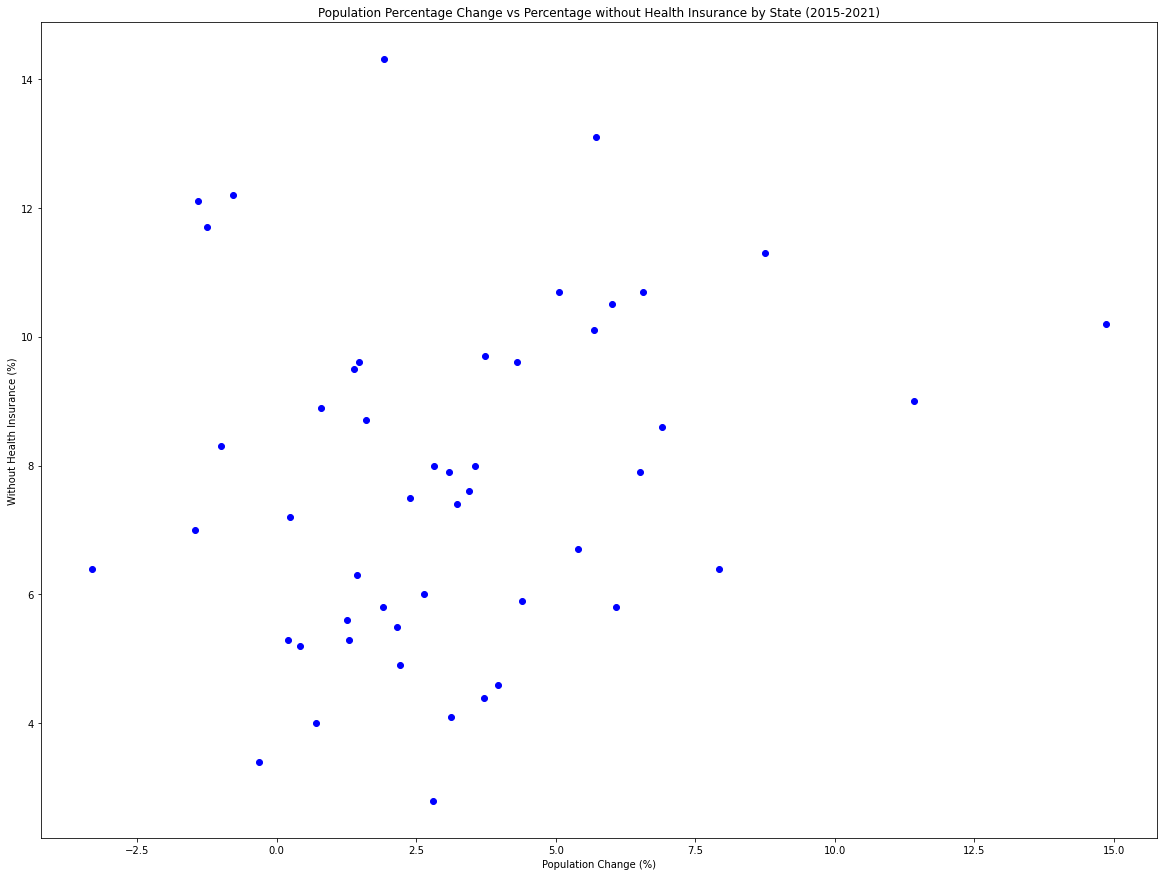

In [37]:
# create a scatter plot with matplotlib of population change percentage vs Percentage without Health Insurance
plt.figure(figsize=(20,15))
plt.plot(state_pwhi_df2["POP_CHANGE_PCT"], state_pwhi_df2["Percentage without Health Insurance"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population Change (%)")
plt.ylabel("Without Health Insurance (%)")
plt.title("Population Percentage Change vs Percentage without Health Insurance by State (2015-2021)")
plt.show()

The correlation between both factors is 0.2
y = 0.16x + 7.3


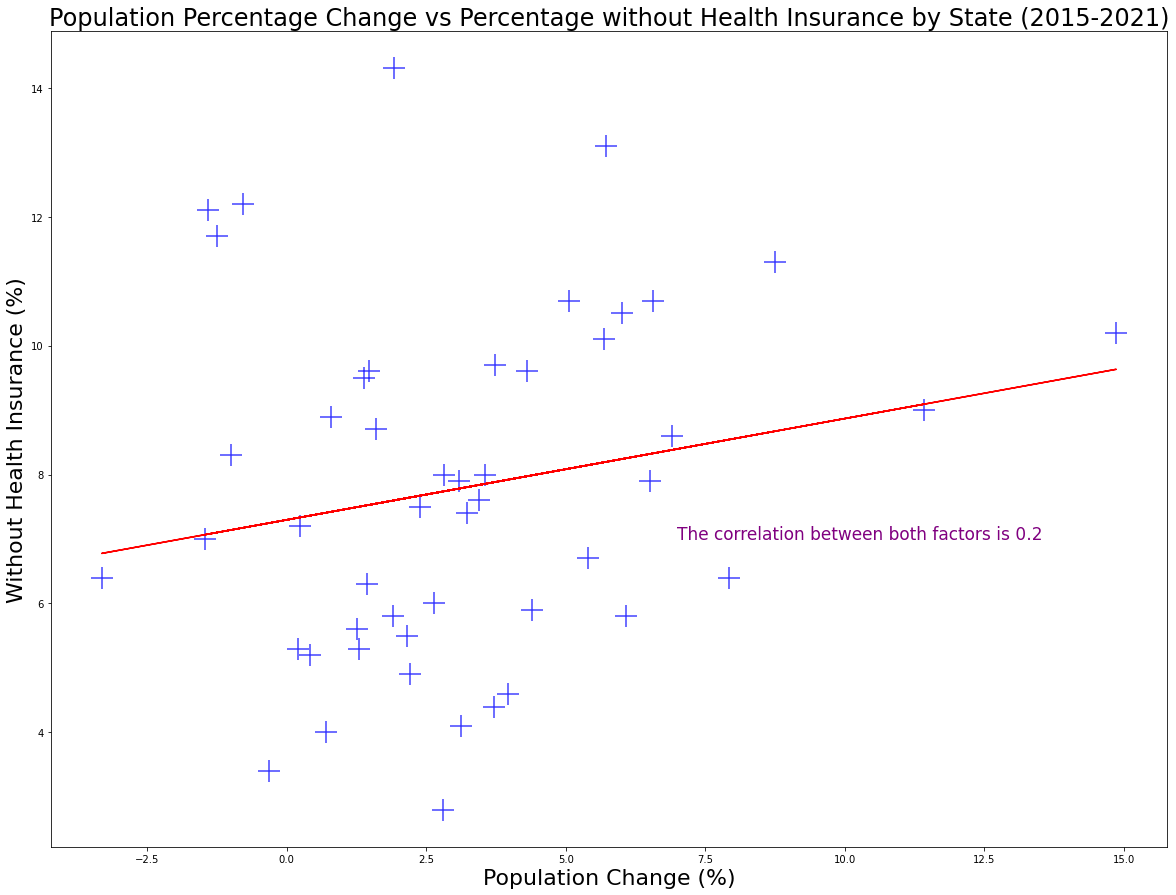

In [39]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_pwhi_df2["POP_CHANGE_PCT"], state_pwhi_df2["Percentage without Health Insurance"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_pwhi_df2["POP_CHANGE_PCT"]
y_values = state_pwhi_df2["Percentage without Health Insurance"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values, marker="+", s=500, color="blue", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (%)", fontsize=22)
plt.ylabel("Without Health Insurance (%)", fontsize=22)
plt.title("Population Percentage Change vs Percentage without Health Insurance by State (2015-2021)", fontsize=24)
plt.annotate((f"The correlation between both factors is {round(correlation[0],2)}"),(7,7),fontsize=17,color="purple")
plt.savefig("pop_change_pct_vs_pwhi.png")
plt.show()

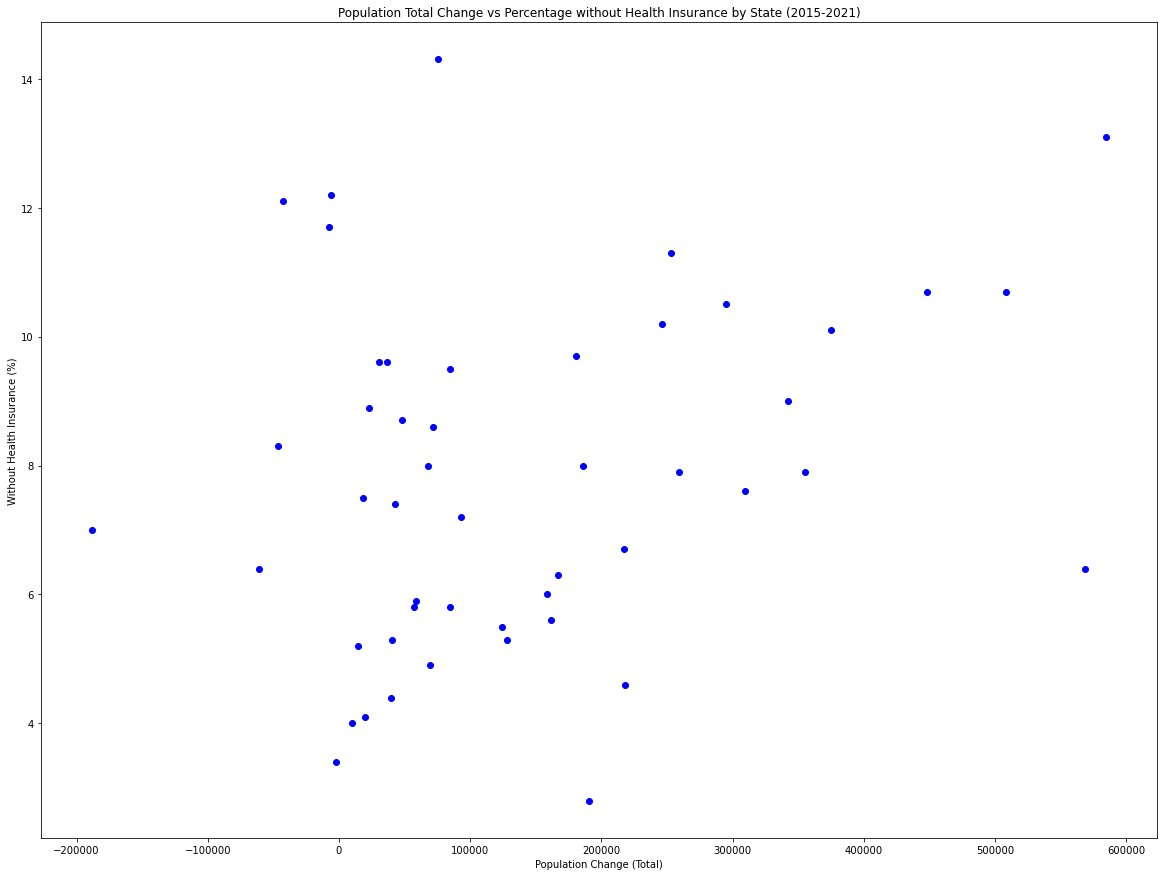

In [40]:
# create a scatter plot with matplotlib of population change total vs Percentage without Health Insurance
plt.figure(figsize=(20,15))
plt.plot(state_pwhi_df2["POP_CHANGE_TOTAL"], state_pwhi_df2["Percentage without Health Insurance"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population Change (Total)")
plt.ylabel("Without Health Insurance (%)")
plt.title("Population Total Change vs Percentage without Health Insurance by State (2015-2021)")
plt.show()

The correlation between both factors is 0.26


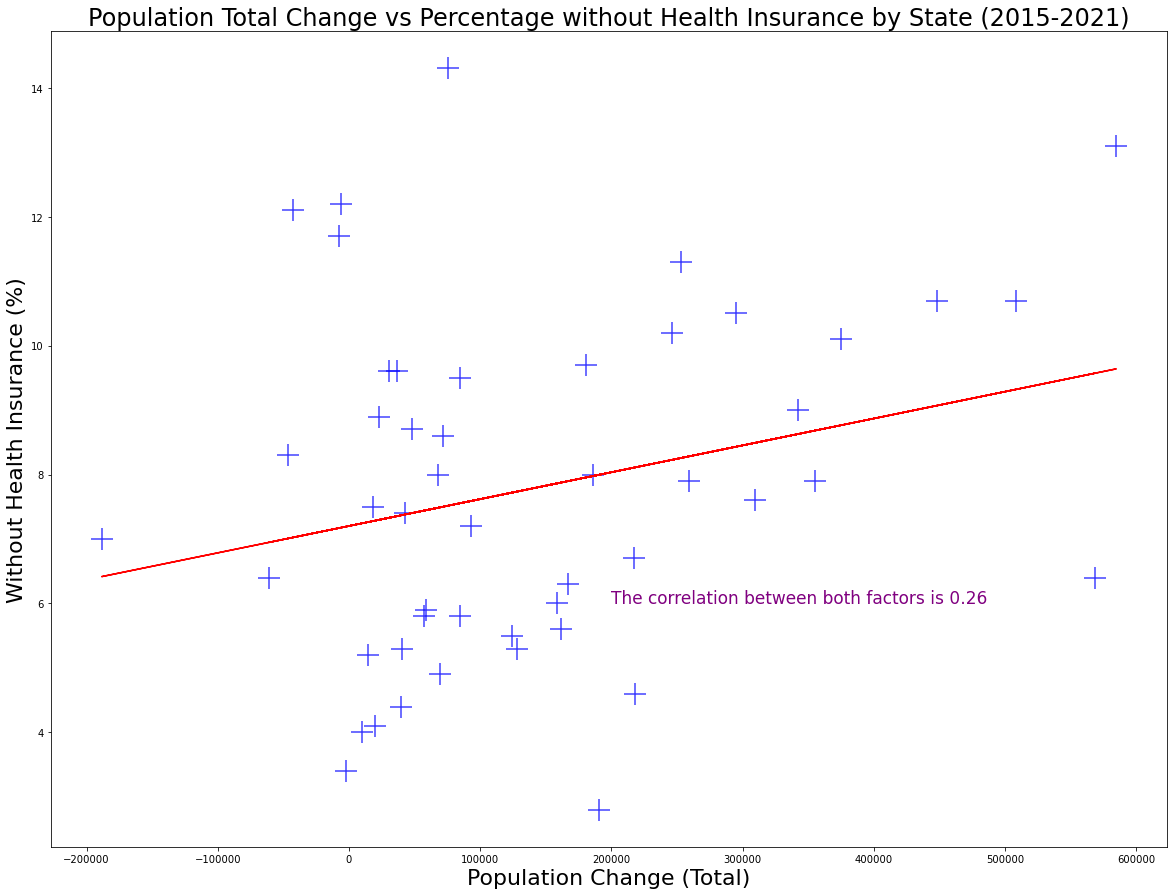

y = 0.0x + 7.2


In [41]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_pwhi_df2["POP_CHANGE_TOTAL"], state_pwhi_df2["Percentage without Health Insurance"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_pwhi_df2["POP_CHANGE_TOTAL"]
y_values = state_pwhi_df2["Percentage without Health Insurance"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values, marker="+", s=500, color="blue", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (Total)", fontsize=22)
plt.ylabel("Without Health Insurance (%)", fontsize=22)
plt.title("Population Total Change vs Percentage without Health Insurance by State (2015-2021)", fontsize=24)
plt.annotate((f"The correlation between both factors is {round(correlation[0],2)}"),(200000,6),fontsize=17,color="purple")
plt.savefig("pop_change_total_vs_pwhi.png")
plt.show()
print(line_eq)

In [69]:
# exclude the District of Columbia and California, New York, Texas and Florida from the dataframe
state_df3 = state_df2[state_df2["State"] != "District of Columbia"]
state_df3 = state_df3[state_df3["State"] != "California"]
state_df3 = state_df3[state_df3["State"] != "New York"]
state_df3 = state_df3[state_df3["State"] != "Texas"]
state_df3 = state_df3[state_df3["State"] != "Florida"]
state_df3

,State,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT,Poverty Rate,Unemployment Rate,Median Household Income,Percentage without Health Insurance
0,Alabama,4858979.0,4863300.0,4874747.0,4887871.0,4903185.0,5024803.0,5039877.0,180898.0,3.722963,15.8,5.4,76150.0,9.7
1,Alaska,738432.0,741894.0,739795.0,737438.0,731545.0,732441.0,732673.0,-5759.0,-0.779896,10.4,6.9,103258.0,12.2
2,Arizona,6828065.0,6931071.0,7016270.0,7171646.0,7278717.0,7177986.0,7276316.0,448251.0,6.564832,13.5,5.6,89693.0,10.7
3,Arkansas,2978204.0,2988248.0,3004279.0,3013825.0,3017804.0,3012232.0,3025891.0,47687.0,1.601200,16.0,5.3,73346.0,8.7
5,Colorado,5456574.0,5540545.0,5607154.0,5695564.0,5758736.0,5784308.0,5812069.0,355495.0,6.514985,9.6,4.6,107446.0,7.9
6,Connecticut,3590886.0,3576452.0,3588184.0,3572665.0,3565287.0,3600260.0,3605597.0,14711.0,0.409676,10.0,6.1,120670.0,5.2
7,Delaware,945934.0,952065.0,961939.0,967171.0,973764.0,991886.0,1003384.0,57450.0,6.073362,11.4,5.7,97081.0,5.8
10,Georgia,10214860.0,10310371.0,10429379.0,10519475.0,10617423.0,10725800.0,10799566.0,584706.0,5.724073,13.9,5.5,91082.0,13.1
11,Hawaii,1431603.0,1428557.0,1427538.0,1420491.0,1415872.0,1451911.0,1441553.0,9950.0,0.695025,9.5,5.2,113310.0,4.0
12,Idaho,1654930.0,1683140.0,1716943.0,1754208.0,1787065.0,1847772.0,1900923.0,245993.0,14.864254,11.4,4.0,83777.0,10.2


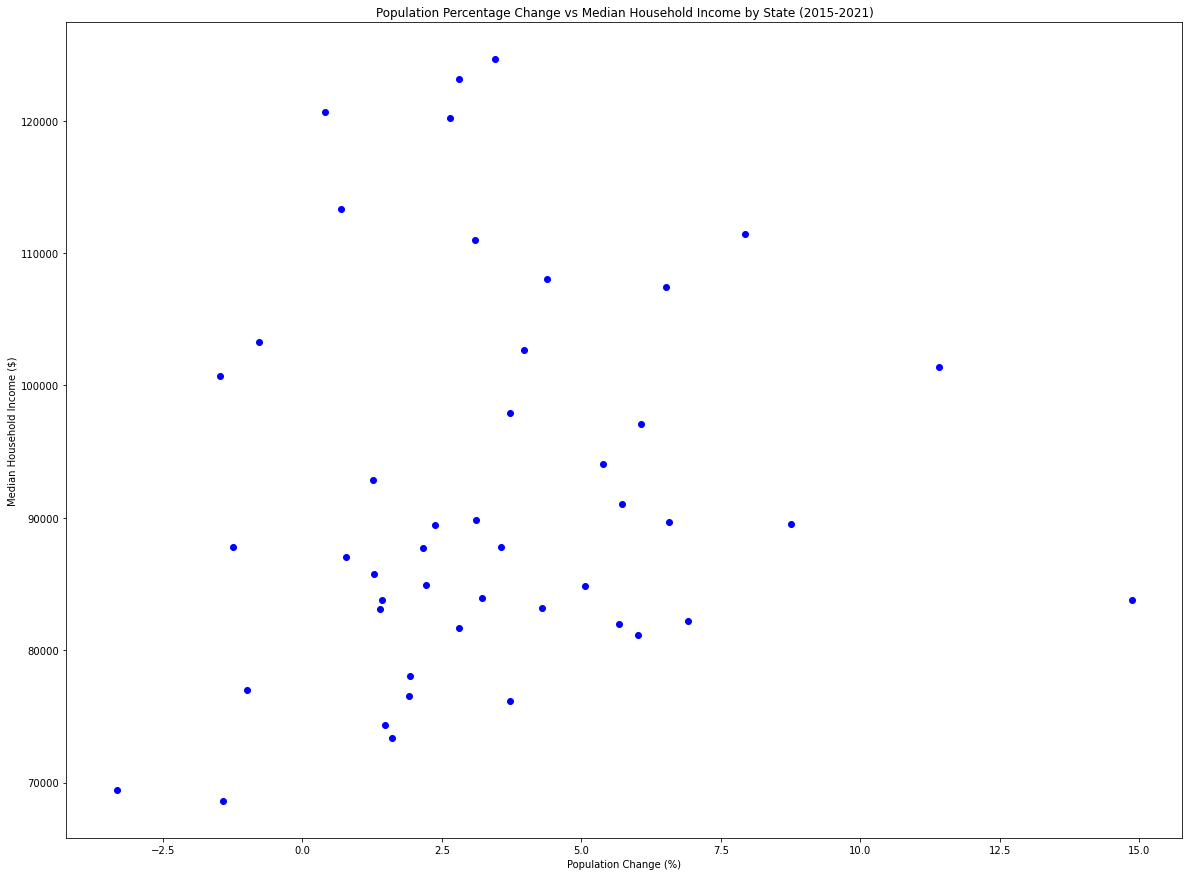

In [70]:
# create a scatter plot with matplotlib to show the relationship between percent population change and average earnings
plt.figure(figsize=(20,15))
plt.plot(state_df3["POP_CHANGE_PCT"], state_df3["Median Household Income"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population Change (%)")
plt.ylabel("Median Household Income ($)")
plt.title("Population Percentage Change vs Median Household Income by State (2015-2021)")
plt.show()

The correlation between both factors is 0.13
y = 562.18x + 89948.73


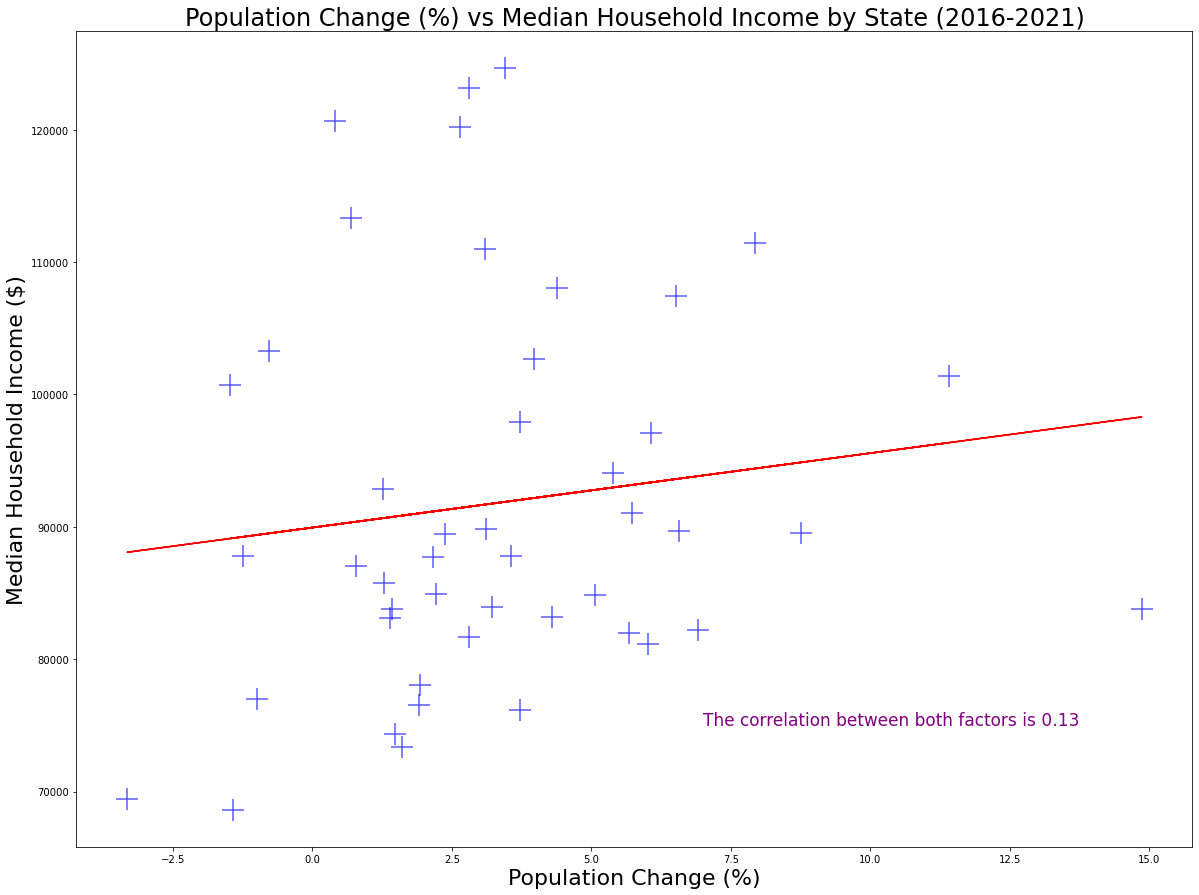

In [71]:
# create a linear regression model for the average earnings per state vs percent population change
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_df3["POP_CHANGE_PCT"], state_df3["Median Household Income"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_df3["POP_CHANGE_PCT"]
y_values = state_df3["Median Household Income"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values, color="blue", marker="+", s=500, alpha=0.65)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (%)", fontsize=22)
plt.ylabel("Median Household Income ($)", fontsize=22)
plt.title("Population Change (%) vs Median Household Income by State (2016-2021)", fontsize=24)
plt.annotate((f"The correlation between both factors is {round(correlation[0],2)}"),(7,75000) , fontsize=17,color="purple")
plt.savefig("pop_change_pct_vs_avg_earnings.png")
plt.show()

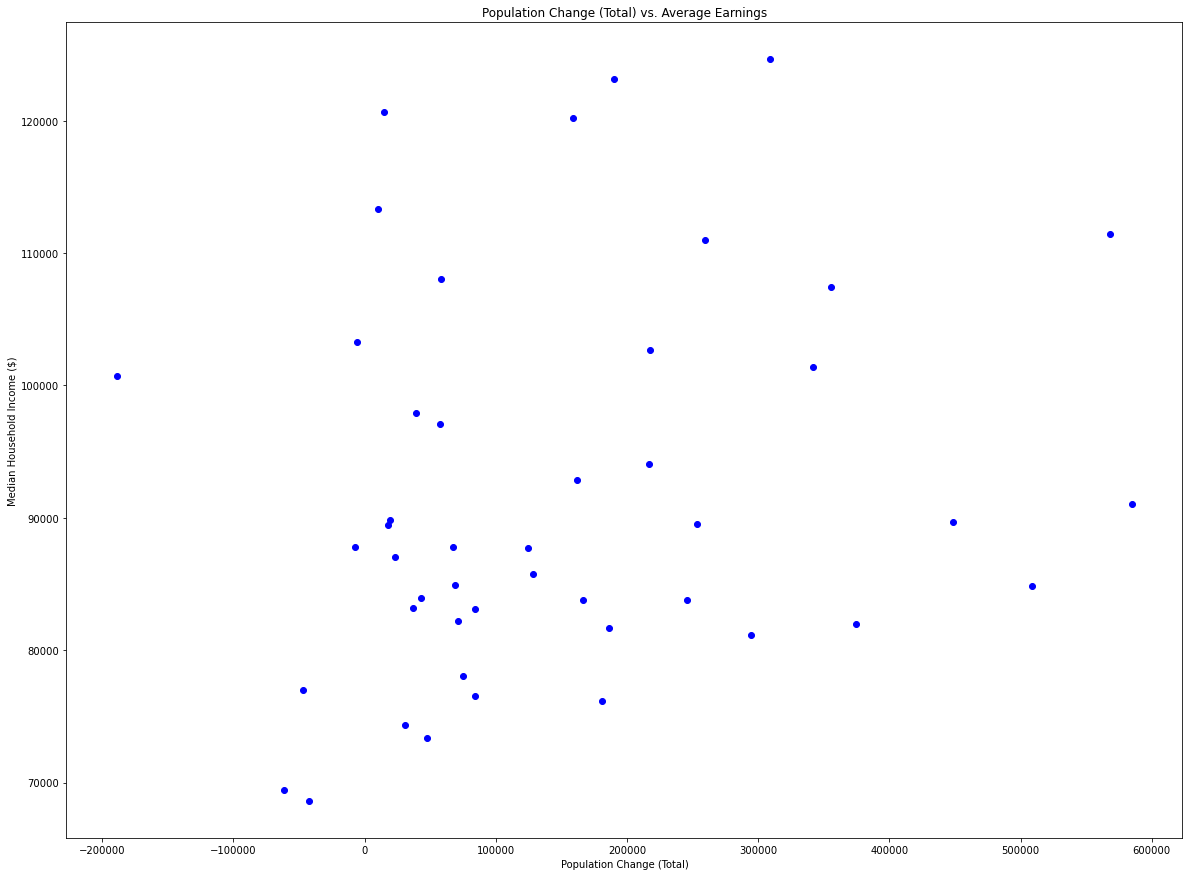

In [72]:
# create a scatter plot with matplotlib to show the relationship between Total population change and average earnings
plt.figure(figsize=(20,15))
plt.plot(state_df3["POP_CHANGE_TOTAL"], state_df3["Median Household Income"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population Change (Total)")
plt.ylabel("Median Household Income ($)")
plt.title("Population Change (Total) vs. Average Earnings")
plt.show()

The correlation between both factors is 0.21
y = 0.02x + 89119.46


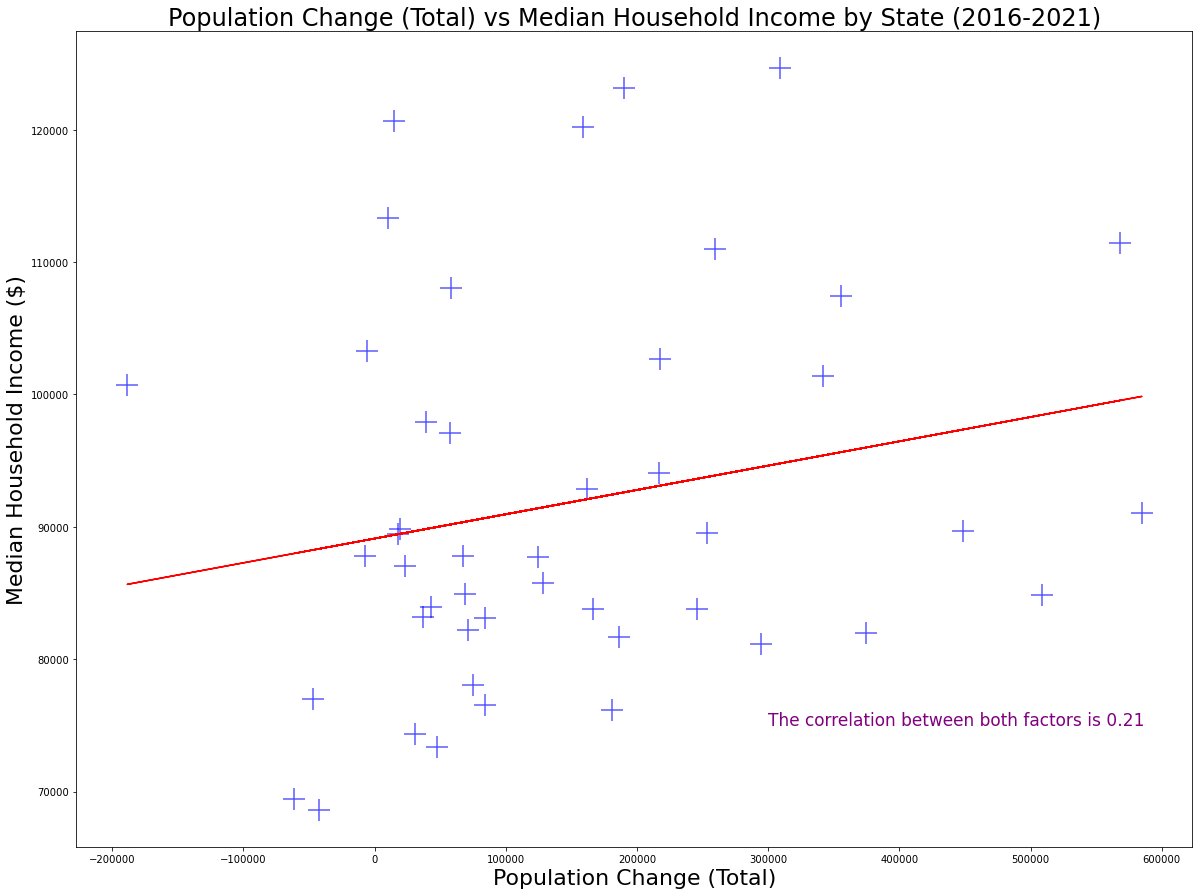

In [74]:
# create a linear regression model for the average earnings per state vs total population change
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_df3["POP_CHANGE_TOTAL"], state_df3["Median Household Income"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_df3["POP_CHANGE_TOTAL"]
y_values = state_df3["Median Household Income"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values, color="blue", marker="+", s=500, alpha=0.65)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (Total)", fontsize=22)
plt.ylabel("Median Household Income ($)", fontsize=22)
plt.title("Population Change (Total) vs Median Household Income by State (2016-2021)", fontsize=24)
plt.annotate((f"The correlation between both factors is {round(correlation[0],2)}"),(300000,75000) , fontsize=17,color="purple")
plt.savefig("pop_change_total_vs_avg_earnings.png")
plt.show()

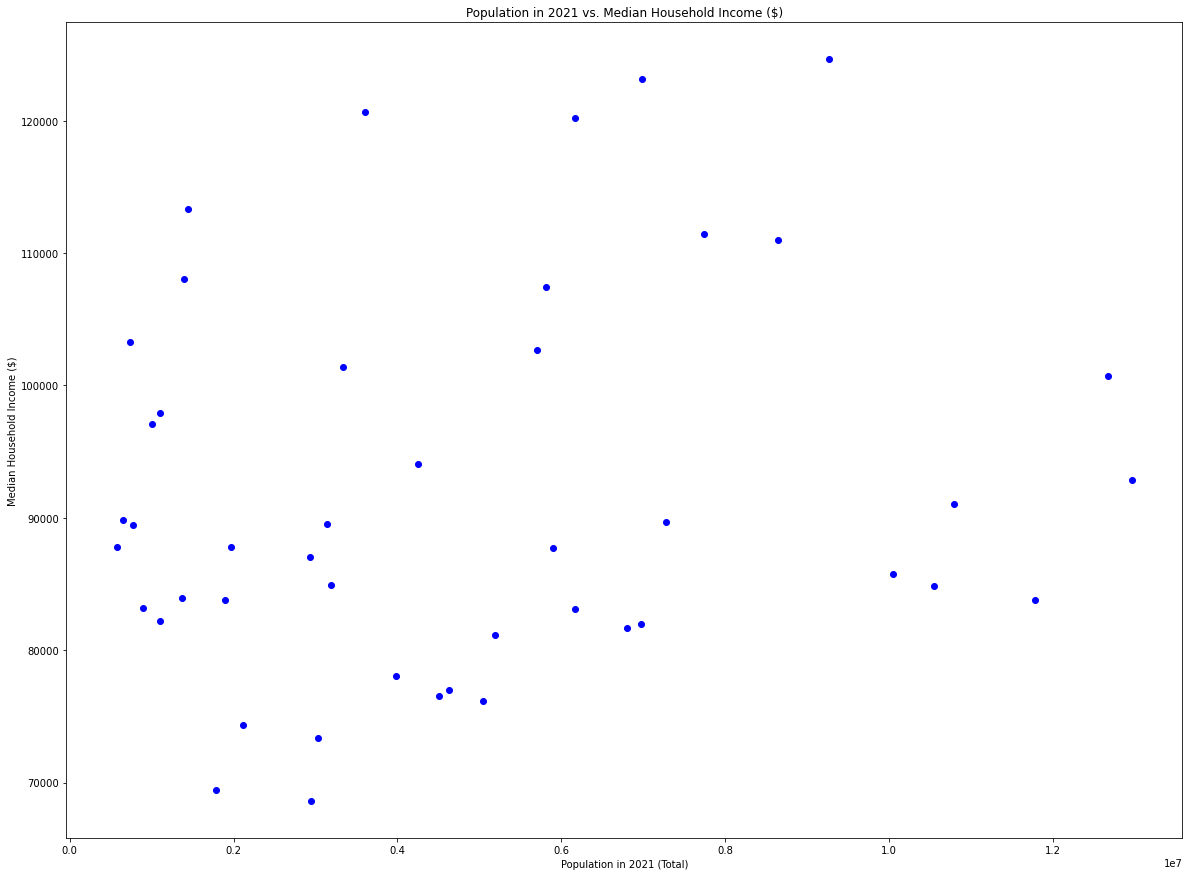

In [75]:
# create a scatter plot with matplotlib to show the relationship between population in 2021 and average earnings
plt.figure(figsize=(20,15))
plt.plot(state_df3["POP_2021"], state_df3["Median Household Income"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population in 2021 (Total)")
plt.ylabel("Median Household Income ($)")
plt.title("Population in 2021 vs. Median Household Income ($)")
plt.show()

The correlation between both factors is 0.18
y = 0.0x + 88219.63


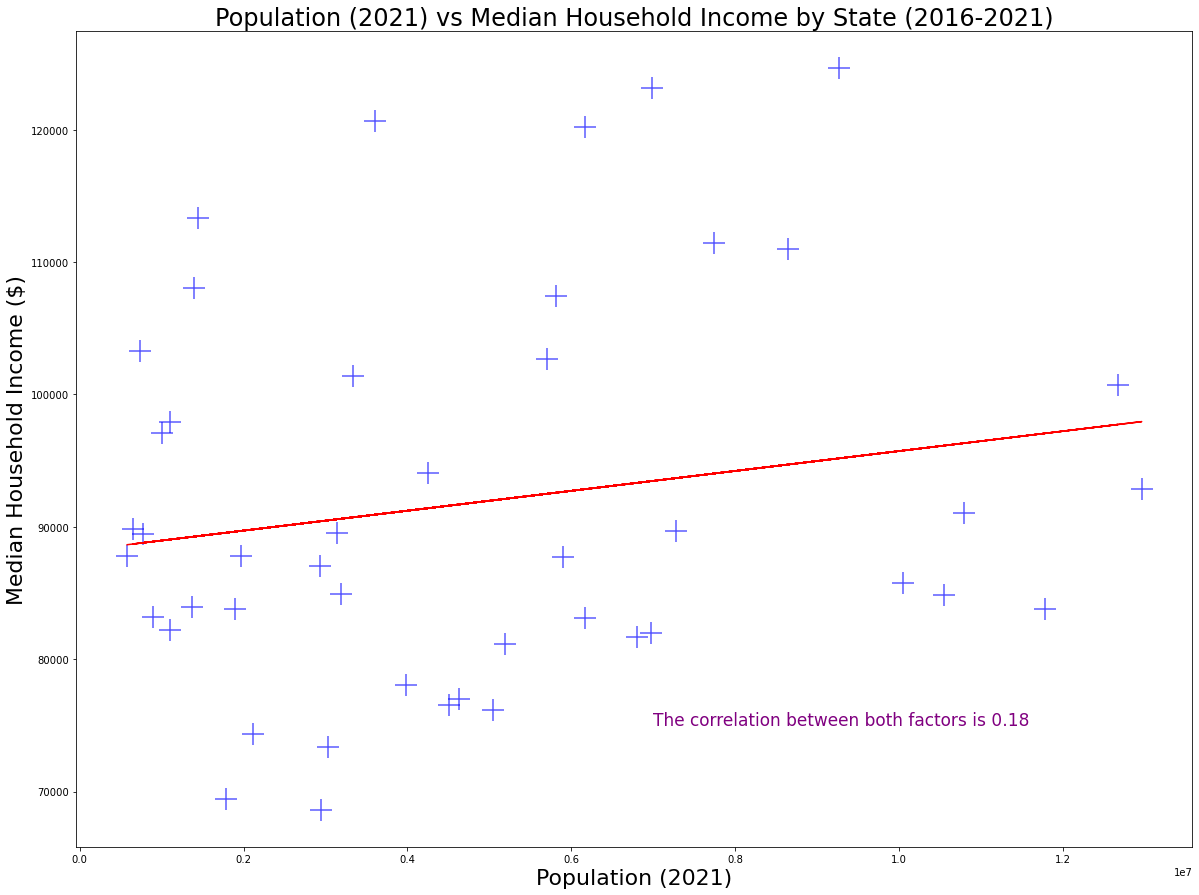

In [77]:
# create a linear regression model for the Median Household Income per state vs total population in 2021
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_df3["POP_2021"], state_df3["Median Household Income"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_df3["POP_2021"]
y_values = state_df3["Median Household Income"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values, color="blue", marker="+", s=500, alpha=0.65)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population (2021)", fontsize=22)
plt.ylabel("Median Household Income ($)", fontsize=22)
plt.title("Population (2021) vs Median Household Income by State (2016-2021)", fontsize=24)
plt.annotate((f"The correlation between both factors is {round(correlation[0],2)}"),(7000000,75000) , fontsize=17,color="purple")
plt.savefig("pop_2021_vs_avg_earnings.png")
plt.show()

In [68]:
# create a dataframe for the top 7 states with the highest average earnings
top_7_earnings = state_df3.sort_values(by=["Median Household Income"], ascending=False).head(7)
top_7_earnings

,State,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT,Poverty Rate,Unemployment Rate,Median Household Income,Percentage without Health Insurance
30,New Jersey,8958013.0,8944469.0,9005644.0,8908520.0,8882190.0,9279743.0,9267130.0,309117.0,3.450732,9.8,6.2,124626.0,7.6
21,Massachusetts,6794422.0,6811779.0,6859819.0,6902149.0,6892503.0,7022220.0,6984723.0,190301.0,2.800842,9.9,5.4,123174.0,2.8
6,Connecticut,3590886.0,3576452.0,3588184.0,3572665.0,3565287.0,3600260.0,3605597.0,14711.0,0.409676,10.0,6.1,120670.0,5.2
20,Maryland,6006401.0,6016447.0,6052177.0,6042718.0,6045680.0,6172679.0,6165129.0,158728.0,2.642647,9.2,5.3,120234.0,6.0
11,Hawaii,1431603.0,1428557.0,1427538.0,1420491.0,1415872.0,1451911.0,1441553.0,9950.0,0.695025,9.5,5.2,113310.0,4.0
48,Washington,7170351.0,7288000.0,7405743.0,7535591.0,7614893.0,7718785.0,7738692.0,568341.0,7.926265,10.0,5.1,111431.0,6.4
47,Virginia,8382993.0,8411808.0,8470020.0,8517685.0,8535519.0,8632044.0,8642274.0,259281.0,3.092941,9.9,4.6,111013.0,7.9


In [97]:
# create a list of the top 7 states with the highest average earnings
state = top_7_earnings["State"].tolist()
# create a list of years from 2015 to 2021
year = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
# create a list of population values per year for each state
new_jersey = [top_7_earnings['POP_2015'].tolist()[0], top_7_earnings['POP_2016'].tolist()[0], top_7_earnings['POP_2017'].tolist()[0], top_7_earnings['POP_2018'].tolist()[0], top_7_earnings['POP_2019'].tolist()[0], top_7_earnings['POP_2020'].tolist()[0], top_7_earnings['POP_2021'].tolist()[0]]
massachusetts = [top_7_earnings['POP_2015'].tolist()[1], top_7_earnings['POP_2016'].tolist()[1], top_7_earnings['POP_2017'].tolist()[1], top_7_earnings['POP_2018'].tolist()[1], top_7_earnings['POP_2019'].tolist()[1], top_7_earnings['POP_2020'].tolist()[1], top_7_earnings['POP_2021'].tolist()[1]]
connecticut = [top_7_earnings['POP_2015'].tolist()[2], top_7_earnings['POP_2016'].tolist()[2], top_7_earnings['POP_2017'].tolist()[2], top_7_earnings['POP_2018'].tolist()[2], top_7_earnings['POP_2019'].tolist()[2], top_7_earnings['POP_2020'].tolist()[2], top_7_earnings['POP_2021'].tolist()[2]]
maryland = [top_7_earnings['POP_2015'].tolist()[3], top_7_earnings['POP_2016'].tolist()[3], top_7_earnings['POP_2017'].tolist()[3], top_7_earnings['POP_2018'].tolist()[3], top_7_earnings['POP_2019'].tolist()[3], top_7_earnings['POP_2020'].tolist()[3], top_7_earnings['POP_2021'].tolist()[3]]
hawaii = [top_7_earnings['POP_2015'].tolist()[4], top_7_earnings['POP_2016'].tolist()[4], top_7_earnings['POP_2017'].tolist()[4], top_7_earnings['POP_2018'].tolist()[4], top_7_earnings['POP_2019'].tolist()[4], top_7_earnings['POP_2020'].tolist()[4], top_7_earnings['POP_2021'].tolist()[4]]
washington = [top_7_earnings['POP_2015'].tolist()[5], top_7_earnings['POP_2016'].tolist()[5], top_7_earnings['POP_2017'].tolist()[5], top_7_earnings['POP_2018'].tolist()[5], top_7_earnings['POP_2019'].tolist()[5], top_7_earnings['POP_2020'].tolist()[5], top_7_earnings['POP_2021'].tolist()[5]]
virginia = [top_7_earnings['POP_2015'].tolist()[6], top_7_earnings['POP_2016'].tolist()[6], top_7_earnings['POP_2017'].tolist()[6], top_7_earnings['POP_2018'].tolist()[6], top_7_earnings['POP_2019'].tolist()[6], top_7_earnings['POP_2020'].tolist()[6], top_7_earnings['POP_2021'].tolist()[6]]
# create a dataframe from the lists
top_7_df = pd.DataFrame({"State": state, "Year": year, "New Jersey": new_jersey, "Massachusetts": massachusetts, "Connecticut": connecticut, "Maryland": maryland, "Hawaii": hawaii, "Washington": washington, "Virginia": virginia})
top_7_df2 = top_7_df.melt(id_vars=["State", "Year"], var_name="State2", value_name="Population")
# drop the extra state column
top_7_df2.drop(columns=["State"], inplace=True)
# rename the state column to State
top_7_df2 = top_7_df2.rename(columns={"State2": "State"})
top_7_df2
# create animated bar chart with plotly express
fig = px.bar(top_7_df2, x='State', y='Population', animation_frame='Year', animation_group='State', color='State', range_y=[0, 9400000], title='Population Change in Top 7 States with Highest Median Household Income', width=1250, height=1000)
fig.update_layout(font_size=20)
fig.show()

In [84]:
# create a dataframe for the bottom 7 states with the lowest median household income
bottom_7_earnings = state_df3.sort_values(by=["Median Household Income"], ascending=True).head(7)
bottom_7_earnings

,State,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_TOTAL,POP_CHANGE_PCT,Poverty Rate,Unemployment Rate,Median Household Income,Percentage without Health Insurance
24,Mississippi,2992333.0,2988726.0,2984100.0,2986530.0,2976149.0,2956870.0,2949965.0,-42368.0,-1.415885,19.4,6.8,68636.0,12.1
49,West Virginia,1844128.0,1831102.0,1815857.0,1805832.0,1792147.0,1789798.0,1782959.0,-61169.0,-3.316961,16.9,6.4,69436.0,6.4
3,Arkansas,2978204.0,2988248.0,3004279.0,3013825.0,3017804.0,3012232.0,3025891.0,47687.0,1.601200,16.0,5.3,73346.0,8.7
31,New Mexico,2085109.0,2081015.0,2088070.0,2095428.0,2096829.0,2117566.0,2115877.0,30768.0,1.475606,18.3,6.6,74363.0,9.6
0,Alabama,4858979.0,4863300.0,4874747.0,4887871.0,4903185.0,5024803.0,5039877.0,180898.0,3.722963,15.8,5.4,76150.0,9.7
17,Kentucky,4425092.0,4436974.0,4454189.0,4468402.0,4467673.0,4503958.0,4509394.0,84302.0,1.905090,16.3,5.3,76511.0,5.8
18,Louisiana,4670724.0,4681666.0,4684333.0,4659978.0,4648794.0,4651203.0,4624047.0,-46677.0,-0.999353,18.8,6.8,77025.0,8.3


In [96]:
# create a list of the bottom 7 states with the lowest median household income
state = bottom_7_earnings["State"].tolist()
# create a list of years from 2015 to 2021
year = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
# create a list of population values per year for each state
mississippi = [bottom_7_earnings['POP_2015'].tolist()[0], bottom_7_earnings['POP_2016'].tolist()[0], bottom_7_earnings['POP_2017'].tolist()[0], bottom_7_earnings['POP_2018'].tolist()[0], bottom_7_earnings['POP_2019'].tolist()[0], bottom_7_earnings['POP_2020'].tolist()[0], bottom_7_earnings['POP_2021'].tolist()[0]]
west_viginia = [bottom_7_earnings['POP_2015'].tolist()[1], bottom_7_earnings['POP_2016'].tolist()[1], bottom_7_earnings['POP_2017'].tolist()[1], bottom_7_earnings['POP_2018'].tolist()[1], bottom_7_earnings['POP_2019'].tolist()[1], bottom_7_earnings['POP_2020'].tolist()[1], bottom_7_earnings['POP_2021'].tolist()[1]]
arkansas = [bottom_7_earnings['POP_2015'].tolist()[2], bottom_7_earnings['POP_2016'].tolist()[2], bottom_7_earnings['POP_2017'].tolist()[2], bottom_7_earnings['POP_2018'].tolist()[2], bottom_7_earnings['POP_2019'].tolist()[2], bottom_7_earnings['POP_2020'].tolist()[2], bottom_7_earnings['POP_2021'].tolist()[2]]
new_mexico = [bottom_7_earnings['POP_2015'].tolist()[3], bottom_7_earnings['POP_2016'].tolist()[3], bottom_7_earnings['POP_2017'].tolist()[3], bottom_7_earnings['POP_2018'].tolist()[3], bottom_7_earnings['POP_2019'].tolist()[3], bottom_7_earnings['POP_2020'].tolist()[3], bottom_7_earnings['POP_2021'].tolist()[3]]
alabama = [bottom_7_earnings['POP_2015'].tolist()[4], bottom_7_earnings['POP_2016'].tolist()[4], bottom_7_earnings['POP_2017'].tolist()[4], bottom_7_earnings['POP_2018'].tolist()[4], bottom_7_earnings['POP_2019'].tolist()[4], bottom_7_earnings['POP_2020'].tolist()[4], bottom_7_earnings['POP_2021'].tolist()[4]]
kentucky = [bottom_7_earnings['POP_2015'].tolist()[5], bottom_7_earnings['POP_2016'].tolist()[5], bottom_7_earnings['POP_2017'].tolist()[5], bottom_7_earnings['POP_2018'].tolist()[5], bottom_7_earnings['POP_2019'].tolist()[5], bottom_7_earnings['POP_2020'].tolist()[5], bottom_7_earnings['POP_2021'].tolist()[5]]
louisiana = [bottom_7_earnings['POP_2015'].tolist()[6], bottom_7_earnings['POP_2016'].tolist()[6], bottom_7_earnings['POP_2017'].tolist()[6], bottom_7_earnings['POP_2018'].tolist()[6], bottom_7_earnings['POP_2019'].tolist()[6], bottom_7_earnings['POP_2020'].tolist()[6], bottom_7_earnings['POP_2021'].tolist()[6]]
# create a dataframe from the lists
bottom_7_df = pd.DataFrame({"State": state, "Year": year, "Mississippi": mississippi, "West Virginia": west_viginia, "Arkansas": arkansas, "New Mexico": new_mexico, "Alabama": alabama, "Kentucky": kentucky, "Louisiana": louisiana})
bottom_7_df2 = bottom_7_df.melt(id_vars=["State", "Year"], var_name="State2", value_name="Population")
# drop the extra state column
bottom_7_df2.drop(columns=["State"], inplace=True)
# rename the state column to State
bottom_7_df2 = bottom_7_df2.rename(columns={"State2": "State"})
bottom_7_df2
# create animated bar chart with plotly express
fig2 = px.bar(bottom_7_df2, x='State', y='Population', animation_frame='Year', animation_group='State', color='State', range_y=[0, 5200000], title='Population Change in Bottom 7 States with Lowest Median Household Income', width=1250, height=1000)
fig2.update_layout(font_size=20)
fig2.show()